# Error Mitigation through ancillas

Since parity and total magnetization are conserved quantities we want to use the four ancillas as a check to measure if an error as occurred.
Here the list of check-circuit that we tested:
* Copy Check
* Parity Measurement
* Magnetization Measurement

## Copy Check
Here is the circuit of copy check (label of the qubits same as in jakarta):



In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np

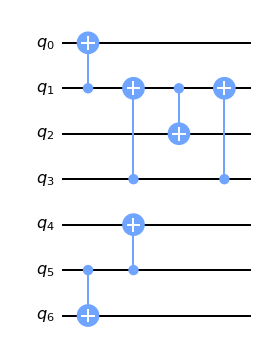

In [2]:
qr=QuantumRegister(7, name="q")
qc=QuantumCircuit(qr)

qc.cx(qr[1],qr[0])
qc.cx(qr[5],qr[6])
qc.cx(qr[5],qr[4])
qc.cx(qr[3],qr[1])
qc.cx(qr[1],qr[2])
qc.cx(qr[3],qr[1])

qc.draw(output='mpl')

### Description
In this circuit the control qubits are copied on the ancillas, since the magnetization is preserved if we measure the ancillas in a different eigenspace the measurement is discarded. 
Additionally we decide to copy qubit 5 two times (one on ancilla 4 and one on 6), so if the states of ancilla 4 and 6 are different we discard the measurement (they should have the same state). \
To sum up, these are the condition that ancillas have to pass in order to keep the measurement:

* ancillas order = [6,4,2,0]
* ancillas conditions = |1110>;|1101>;|0011>

The qubits used to simulate the Hamiltonian has to be measured before ancillas in order to not interfere with the state tomography.



## Parity Check
We have two different circuit for parity check: 








### Parity check one ancilla 

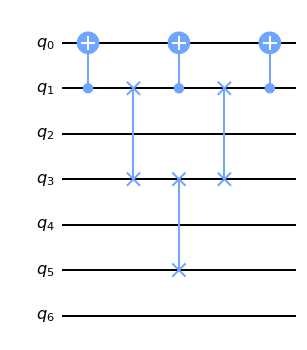

In [3]:
qr=QuantumRegister(7, name="q")
qc=QuantumCircuit(qr)

qc.cx(qr[1],qr[0])
qc.swap(qr[1],qr[3])
qc.cx(qr[1],qr[0])
qc.swap(qr[5],qr[3])
qc.swap(qr[1],qr[3])
qc.cx(qr[1],qr[0])
qc.draw(output='mpl')

### Description 
This circuit perform a parity measurement on the ancilla 0 (|0> for a even state and |1> if is odd). In this case the parity is 0 so if the measure of the ancilla gives |1> we discard the data. \
The ancilla can be measure before the measurement of qubits used to simulate the Hamiltonian. \
Due to the geometry of Jakarta we need to introduce three SWAP gates that imply 9 c-not so this check is more likely subject to errors.


### Parity Check two ancillas

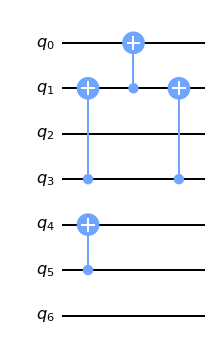

In [4]:
qr1=QuantumRegister(7, name="q")
qc=QuantumCircuit(qr1)
qc.cx(qr1[5],qr1[4])
qc.cx(qr1[3],qr1[1])
qc.cx(qr1[1],qr1[0])
qc.cx(qr1[3],qr1[1])
qc.draw(output='mpl')

### Description
With parity 0 (number of 1 even) the possible states of the ancillas are |00> or |11>.\
Qubits used to simulate the Hamiltonian must be measure before the ancillas but the lenght of the circuit is way shorter than the parity check circuit with one ancilla. \




# Magnetization Check




Firstly we have to introduce che C-S (control-s) gate:

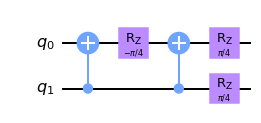

In [5]:
pi=np.pi
qr=QuantumRegister(2,  name="q")
CS_qc=QuantumCircuit(qr,name='C-S')

CS_qc.cx(qr[1],qr[0])
CS_qc.rz(-pi/4,qr[0])
CS_qc.cx(qr[1],qr[0])
CS_qc.rz(pi/4,qr[0])
CS_qc.rz(pi/4,qr[1])


CS_qc.draw(output='mpl')

where qubit 1 is the control

Here is magnetization measurement circuit:

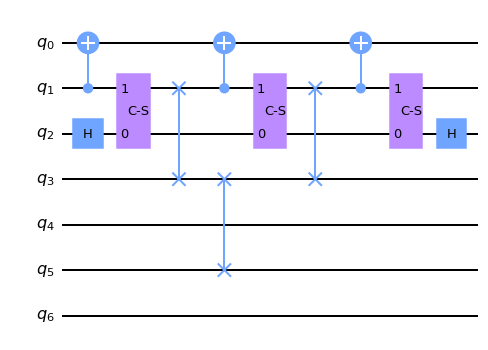

In [6]:
qr=QuantumRegister(7,  name="q")
qc=QuantumCircuit(qr)

qc.h(qr[2])
qc.cx(qr[1],qr[0])
qc.append(CS_qc,[qr[2],qr[1]])
qc.swap(qr[1],qr[3])
qc.cx(qr[1],qr[0])
qc.append(CS_qc,[qr[2],qr[1]])
qc.swap(qr[5],qr[3])
qc.swap(qr[1],qr[3])
qc.cx(qr[1],qr[0])
qc.append(CS_qc,[qr[2],qr[1]])
qc.h(qr[2])
qc.draw(output='mpl')

### Description

Gives a magnetization check but only two ancillas are needed (instead of three with copy check) and mid-measurment of ancillas can be performed. \
Due to geometry of jakarta we need three swap gate to implement this check so the circuit is pretty long and likely subject to error (in particular compare to copy check circuit). \
In our case (magnetization=2) the ancilla condition is:

* ancilla order = [2,0]
* ancilla condition = |10>



In conclusion the best solution is the copy check because with 6 cnots reduce the Hilbert space better than the parity measurement (4 cnots)